In [10]:
import numpy as np
from utils_adaptive import run_adaptive
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams.update({'font.size': 14})
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('legend', fontsize=12)
matplotlib.rcParams['savefig.dpi'] = 1200

%load_ext autoreload
%autoreload 2
import time
import scipy.stats as scs
import math


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [159]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3 * variance, mu + 3 * variance, 100)

In [157]:
N = 1000; T_max = 10; T = T_max
tau = 1; fs_pct = 0.1; t0 = 2; 
num_mc = 1000
prec_thres = 0.075 * N
sim_sigma = 3

In [158]:
out = run_adaptive(tau, fs_pct=fs_pct, num_mc=num_mc, N=N, T_max=T_max, 
                   t0=t0, adaptive=True, prec_thres=prec_thres, print_out=False, sigma=sim_sigma)

100/1000 done
200/1000 done
300/1000 done
400/1000 done
500/1000 done
600/1000 done
700/1000 done
800/1000 done
900/1000 done
1000/1000 done


In [160]:
out_df = pd.DataFrame(out)
# out['T_ast']

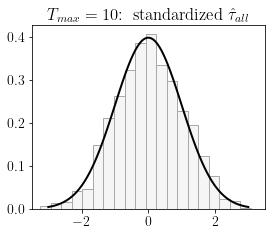

In [173]:
fig = plt.figure(figsize=(4,3.5))
plt.xlim([-3.5, 3.5])
plt.hist(out_df['tau_err_std'], density=True, bins=20, color="whitesmoke", edgecolor="darkgrey")
plt.plot(x, scs.norm.pdf(x, mu, sigma), color='k', linewidth=2);
plt.title("$T_{max}="+str(T)+"\mathrm{:\ standardized\ }\\hat{\\tau}_{all}$")
plt.tight_layout()
plt.savefig("../result/simulation/tau_T_"+str(T)+"_adaptive.pdf")

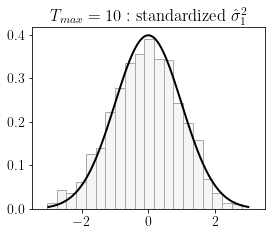

In [174]:
fig = plt.figure(figsize=(4,3.5))
# plt.hist(result/np.std(result), density=True, bins=25)
plt.xlim([-3.5, 3.5])
plt.hist(out_df['sigma_err_1_std'], density=True, bins=20, color="whitesmoke", edgecolor="darkgrey")
plt.plot(x, scs.norm.pdf(x, mu, sigma), color='k', linewidth=2);
plt.title("$T_{max}="+str(T)+": \mathrm{standardized\ }\\hat{\\sigma}_1^2$")
plt.tight_layout()
plt.savefig("../result/simulation/sigma_1_T_"+str(T)+"_adaptive.pdf")

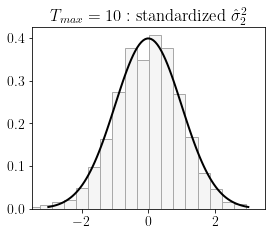

In [175]:
fig = plt.figure(figsize=(4,3.5))
# plt.hist(result/np.std(result), density=True, bins=25)
plt.xlim([-3.5, 3.5])
plt.hist(out_df['sigma_err_2_std'], density=True, bins=20, color="whitesmoke", edgecolor="darkgrey")
plt.plot(x, scs.norm.pdf(x, mu, sigma), color='k', linewidth=2);
plt.title("$T_{max}="+str(T)+": \mathrm{standardized\ }\\hat{\\sigma}_2^2$")
plt.tight_layout()
plt.savefig("../result/simulation/sigma_2_T_"+str(T)+"_adaptive.pdf")

In [182]:
print(np.mean(out_df["tau_adaptive"]**2), np.mean(out_df["tau_bm"]**2), np.mean(out_df["tau_oracle"]**2))

0.010295143497273859 0.011183320357358133 0.006088398378809464


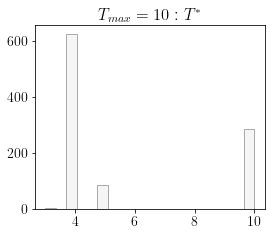

In [180]:
fig = plt.figure(figsize=(4,3.5))
# plt.hist(result/np.std(result), density=True, bins=25)
# plt.xlim([-3.5, 3.5])
plt.hist(out_df['T_ast'], bins=20, color="whitesmoke", edgecolor="darkgrey")
plt.title("$T_{max}="+str(T)+": T^{\\ast}$")
plt.tight_layout()
plt.savefig("../result/simulation/T_ast_adaptive.pdf")



In [181]:
print(T, np.mean(out_df['tau_err_std']**2), 
      np.mean(out_df['sigma_err_1_std']**2), 
      np.mean(out_df['sigma_err_2_std']**2), 
      np.mean(out_df['tau_err_std']*out_df['sigma_err_1_std']),
      np.mean(out_df['tau_err_std']*out_df['sigma_err_2_std']),
      np.mean(out_df['sigma_err_1_std']*out_df['sigma_err_2_std']),
     )



10 1.0285467115159437 1.067023904783622 0.9898427723770944 0.029715958426498035 -0.025643550657443913 -0.021043378791919302
